# 머신러닝

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
data_path = '/hdd/data/adp_data/hotel_bookings.csv'
hotel = pd.read_csv(data_path)
hotel

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


(1) 데이터를 탐색하고 탐색 결과를 제시하시오.

In [3]:
hotel.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [5]:
hotel.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


In [6]:
hotel['deposit_type'].value_counts(dropna = False)

deposit_type
No Deposit    19138
Non Refund      834
Refundable       28
Name: count, dtype: int64

In [7]:
hotel.groupby(hotel['deposit_type']).mean()['adr']

deposit_type
No Deposit    101.965190
Non Refund     89.689476
Refundable     67.456154
Name: adr, dtype: float64

(2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [8]:
na_cols = ['lead_time', 'is_repeated_guest', 'adr']

for na_col in na_cols:
    temp = round(
        hotel[na_col].isna().sum() / len(hotel) * 100,
        2
    )
    print(f'{na_col} 결측치 비율: ', temp, '%')

lead_time 결측치 비율:  0.02 %
is_repeated_guest 결측치 비율:  1.79 %
adr 결측치 비율:  5.32 %


- lead_time은 결측치가 1% 미만이므로 삭제 <br>
- is_repeated_guest는 빈값으로 대체 <br>
- adr은 deposit_type별 평균으로 대체

In [9]:
hotel_nonnull = hotel.copy()

hotel_nonnull.dropna(subset = ['lead_time'], axis = 0, inplace = True)

hotel_nonnull['is_repeated_guest'] = hotel_nonnull['is_repeated_guest'].fillna(
    hotel_nonnull['is_repeated_guest'].value_counts().idxmax()
)

hotel_nonnull['adr'] = hotel_nonnull.groupby('deposit_type')['adr'].transform(
    lambda x: x.fillna(x.mean())
)

hotel_nonnull.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

(3) 데이터 질을 항상시킬 수 있는 방법을 제안하시오.

- lead_time 변수의 이상치 보정
- is_repeated_guest 변수에서 수가 적은 클래스의 자료를 더 수집하여 자료의 불균형 해결

(4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

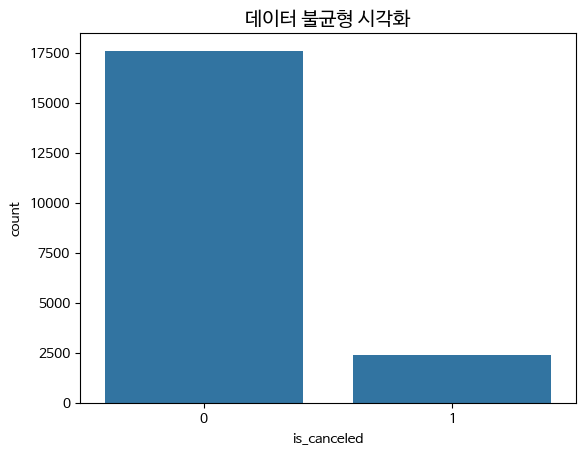

0 비율: 88.0%
1 비율: 12.0%


In [10]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

sns.countplot(x = 'is_canceled', data = hotel_nonnull)
plt.title('데이터 불균형 시각화', fontsize = 14)
plt.show()

ratio0 = round(
    len(hotel_nonnull[hotel_nonnull['is_canceled'] == 0]) / len(hotel_nonnull) * 100,
    2
)
ratio1 = round(
    len(hotel_nonnull[hotel_nonnull['is_canceled'] == 1]) / len(hotel_nonnull) * 100,
    2
)
print('0 비율: {}%'.format(ratio0))
print('1 비율: {}%'.format(ratio1))

(5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

random oversampling, SMOTE <br>
언더 샘플링은 데이터 손실로 예측성능이 저하될 수 있으므로 오버샘플링 사용.

(6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

In [11]:
hotel_nonnull = pd.get_dummies(hotel_nonnull)

X = hotel_nonnull[hotel_nonnull.columns.difference(['is_canceled'])]
y = hotel_nonnull['is_canceled']

start = time.time()

ros = RandomOverSampler(random_state = 526)
X_ro, y_ro = ros.fit_resample(X, y)
print('time: ', time.time() - start)

time:  0.0363774299621582


In [12]:
start = time.time()

sm = SMOTE(random_state = 526)
X_sm, y_sm = sm.fit_resample(X, y)
print('time: ', time.time() - start)

time:  0.03565073013305664


SMOTE는 데이터의 과적합을 방지할 수 있으므로 선택.

(7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [13]:
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state =  526
)

clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, random_state = 526)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print('train 정확도: ', clf.score(X_train, y_train))
print(classification_report(y_test, pred))
print('time: ', time.time() - start)

train 정확도:  0.9342335583895974
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3519
           1       0.96      0.37      0.54       480

    accuracy                           0.92      3999
   macro avg       0.94      0.69      0.75      3999
weighted avg       0.93      0.92      0.91      3999

time:  1.7060563564300537


In [14]:
start = time.time()

X_ro_train, X_ro_test, y_ro_train, y_ro_test = train_test_split(
    X_ro, y_ro, test_size = 0.2, stratify = y_ro, random_state =  526
)

clf_ro = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, random_state = 526)
clf_ro.fit(X_ro_train, y_ro_train)

pred = clf_ro.predict(X_ro_test)

print('train 정확도: ', clf_ro.score(X_ro_train, y_ro_train))
print(classification_report(y_ro_test, pred))
print('time: ', time.time() - start)

train 정확도:  0.9849033816425121
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      3519
           1       0.94      0.98      0.96      3519

    accuracy                           0.96      7038
   macro avg       0.96      0.96      0.96      7038
weighted avg       0.96      0.96      0.96      7038

time:  2.688244581222534


In [15]:
start = time.time()

X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(
    X_sm, y_sm, test_size = 0.2, stratify = y_sm, random_state =  526
)

clf_sm = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, random_state = 526)
clf_sm.fit(X_sm_train, y_sm_train)

pred = clf_sm.predict(X_sm_test)

print('train 정확도: ', clf_sm.score(X_sm_train, y_sm_train))
print(classification_report(y_sm_test, pred))
print('time: ', time.time() - start)

train 정확도:  0.9638036373969878
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3519
           1       0.90      0.87      0.88      3519

    accuracy                           0.89      7038
   macro avg       0.89      0.89      0.89      7038
weighted avg       0.89      0.89      0.89      7038

time:  3.1627275943756104


(8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

random_oversampling이 속도, 정확도 측면에서 좋음.